Import necessary libraries

In [1]:
!pip install gensim
import nltk
import re
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Download stopwords and tokenizer if not available

In [15]:
import nltk
nltk.data.path.append('/usr/local/share/nltk_data')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Preprocessing: Tokenization and stopword removal

In [16]:
# Sample text corpus
corpus = """
Natural language processing enables machines to understand and generate human language.
Word embeddings such as Word2Vec provide dense vector representations of words in a continuous space.
The Continuous Bag of Words (CBOW) model predicts a target word from its context words.
It improves word similarity representation and helps in tasks like machine translation and sentiment analysis.
"""
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return filtered_tokens

# Process the corpus
processed_corpus = [preprocess_text(sentence.strip()) for sentence in corpus.split('.') if sentence.strip()]


Train CBOW model using Word2Vec

    CBOW predicts the target word from its surrounding context words
    Formula: P(w_target | w_context) = exp(v_target . v_context) / sum(exp(v_all . v_context))

In [17]:
model = Word2Vec(sentences=processed_corpus, vector_size=50, window=2, min_count=1, sg=0)  # sg=0 for CBOW

Extract word vectors

In [18]:
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

Reduce dimensions using PCA for visualization

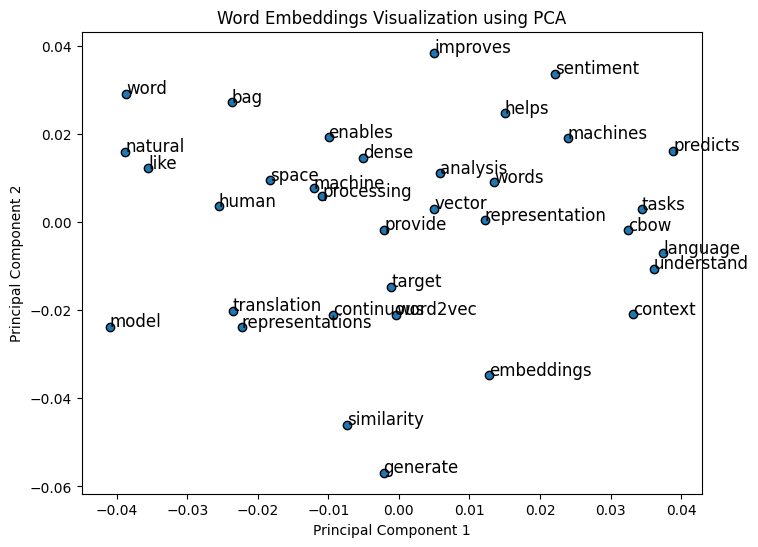

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# Visualizing the word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k')
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Further visualization using t-SNE

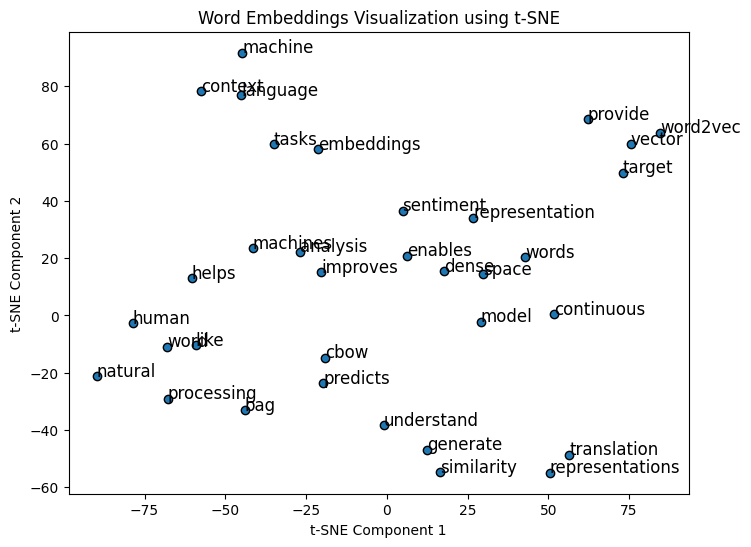

In [20]:
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k')
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), fontsize=12)
plt.title("Word Embeddings Visualization using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


Finding similar words

In [21]:
def find_similar_words(word):
    if word in model.wv:
        return model.wv.most_similar(word, topn=5)
    else:
        return "Word not in vocabulary"

# Example query
print("Similar words to 'word':", find_similar_words('word'))

Similar words to 'word': [('like', 0.3760870397090912), ('human', 0.22954730689525604), ('helps', 0.22074033319950104), ('improves', 0.21909569203853607), ('natural', 0.1948249191045761)]
